### P.M. Made me
#### Inspiration source: https://en.wikipedia.org/wiki/Monty_Hall_problem

In [8]:
#libs
import matplotlib.pyplot as plt
import numpy as np
import random

Some input data:
- games -> number of single games with n number of tries
- tries -> well, thats n 
- doors -> list representing number, of which one will contain prize

In [2]:
#input data
games = 1000
tries = 9999
doors = [1,2,3]

Now, function that represents the logic of the game.
Key points to notice:

- Doors with prize and choosen are assigned randomly out of list *doors*
- When the hosts knew that choosen doors contained the prize, he opened one of the empty, thus player could only switch to the other empty doors (that is the first part of if statement)
- When the host knew that choosen doors did not contain the prize, he opened the only empty doors, thus player could only switch to doors that contained the prize (that is the second part of if statement)
- For more than 3 doors, I've took the aproach from the source - hosts (or pc in this case) opens all of the remaining, leaving only choosen doors and one more (with prize or not)

In [3]:
def the_game(doors, tries, change):
    wins = 0
    for i in range(0,tries):
        current_round = doors.copy()

        #place for prize
        prize = random.choice(current_round)

        #picking a door
        choice = random.choice(current_round)

        #pc knows where the prize is
        #so depending on that we have twos scenarios
        if prize == choice:
            #the first one - we know that chosen doors have prize
            #we open random, empty doors, and the second empty doors are the one that can be switched too
            current_round.remove(choice)
            opening = random.choice(current_round)
            current_round.remove(opening)
            to_change =  current_round[0]
        else:
            #the sceond one - chosen doors do not have prize
            #we have to open those that are empty and leave only those that have price
            current_round.remove(choice)
            current_round.remove(prize)
            to_change =  prize


        #simulating change:
        if change:
            choice = to_change

        #final
        if choice == prize:
            wins += 1

    return wins


Now, running many games to create some data for histograms

In [9]:
#running many games - with change = True
games_true = []
for i in range(0, games):
    games_true.append(the_game(doors, tries, True))
games_true_mean = np.mean(games_true)

#running many games - with change = False
games_false = []
for i in range(0, games):
    games_false.append(the_game(doors, tries, False))
games_false_mean = np.mean(games_false)


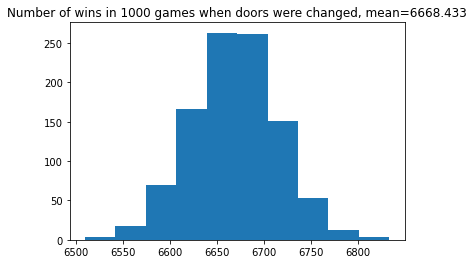

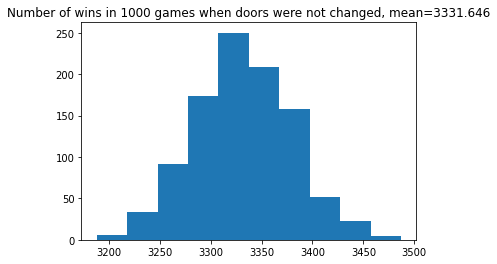

In [10]:
plt.hist(games_true)
plt.title(f"Number of wins in {games} games when doors were changed, mean={games_true_mean}")
plt.show()
plt.hist(games_false)
plt.title(f"Number of wins in {games} games when doors were not changed, mean={games_false_mean}")
plt.show()

So, for thousand games, with each game having 9999 tries, you'll get twice more wins just by changing the doors :)